# Script to plot average causal effects

This script loads sets of hundreds of causal traces that have been computed by the
`experiment.causal_trace` program, and then aggregates the results to compute
Average Indirect Effects and Average Total Effects as well as some other information.


In [5]:
import json  

knowns_data = json.load(open("../known_1000.json"))

knowns_map = {k['known_id']:k for k in knowns_data}

In [6]:
from transformers import AutoTokenizer

In [7]:
display_modelname="phi"

In [8]:
def decode_tokens(tokenizer, token_array):
    if hasattr(token_array, "shape") and len(token_array.shape) > 1:
        return [decode_tokens(tokenizer, row) for row in token_array]
    return [tokenizer.decode([t]) for t in token_array]

def find_token_range(tokenizer, token_array, substring):
    toks = decode_tokens(tokenizer, token_array)
    # print(f"Rahul the display modelname is {display_modelname}")
    if display_modelname != 'phi':
        whole_string = tokenizer.decode(token_array).replace(' ', '')
        sub = substring.replace(' ', '')
    else:
        whole_string = ''.join(toks)
        sub = substring.strip() 
    char_loc = whole_string.rindex(sub)
    loc = 0
    tok_start, tok_end = None, None
    all_spans = []
    cur=0
    for i, t in enumerate(toks):
        loc += len(t)
        if tok_start is None and loc > char_loc:
            tok_start = i
        if tok_end is None and loc >= char_loc + len(sub):
            tok_end = i + 1
            cur+=1
            return tok_start, tok_end

In [9]:
modelname = None

if display_modelname == "llama":
    modelname = "/work/pi_dhruveshpate_umass_edu/rseetharaman_umass_edu/llama-2-7b-hf"
else:
    modelname = "microsoft/phi-2"

tokenizer = AutoTokenizer.from_pretrained(modelname)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [10]:
def get_subject_index(known_id, knowns_map):
    knowledge = knowns_map[known_id]
    subject = knowledge['subject']
    prompt = knowledge['prompt']
    inputs = tokenizer(prompt)['input_ids']
    s,e=find_token_range(tokenizer, inputs, subject)
    return s,e

Average Total Effect 0.744690509647904
Best average indirect effect on last subject 0.004991913349209374
Best average indirect effect on last token 0.023706110329208916
Average best-fixed score 0.05237553
Average best-fixed on last subject token score 0.019217474
Average best-fixed on last word score 0.041349243
Argmax at last subject token 5
Max at last subject token 0.014371924
Argmax at last prompt token 23
Max at last prompt token 0.03308612
Skipped 113 prompts due to a weird tokenizer thingy
Average Total Effect 0.3612474451029425
Best average indirect effect on last subject 0.1466344842875128
Best average indirect effect on last token 0.0791177252495413
Average best-fixed score 0.29083955
Average best-fixed on last subject token score 0.2294879
Average best-fixed on last word score 0.15356901
Argmax at last subject token 5
Max at last subject token 0.20159602
Argmax at last prompt token 23
Max at last prompt token 0.13407926
Skipped 0 prompts due to a weird tokenizer thingy


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

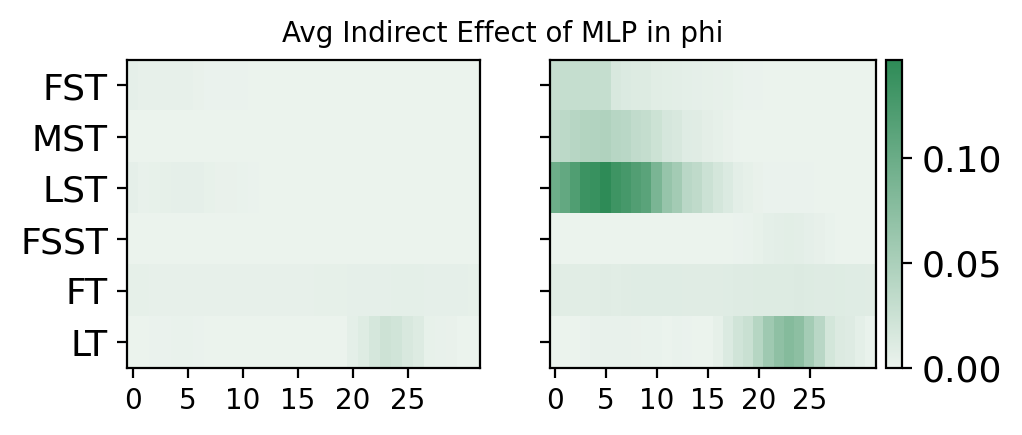

Average Total Effect 0.744690509647904
Best average indirect effect on last subject 0.014522966132340973
Best average indirect effect on last token 0.45340261063057
Average best-fixed score 0.5120269
Average best-fixed on last subject token score 0.02752879
Average best-fixed on last word score 0.51200384
Argmax at last subject token 5
Max at last subject token 0.023902977
Argmax at last prompt token 23
Max at last prompt token 0.46278262
Skipped 113 prompts due to a weird tokenizer thingy


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


Average Total Effect 0.3612474451029425
Best average indirect effect on last subject 0.17535747086645415
Best average indirect effect on last token 0.21196817850710203
Average best-fixed score 0.32417864
Average best-fixed on last subject token score 0.24372898
Average best-fixed on last word score 0.2887338
Argmax at last subject token 5
Max at last subject token 0.23031901
Argmax at last prompt token 20
Max at last prompt token 0.26692972
Skipped 0 prompts due to a weird tokenizer thingy


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

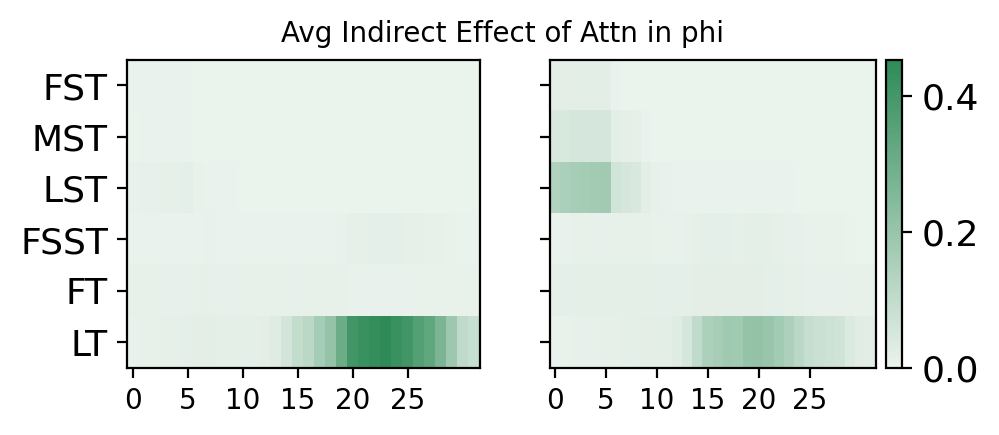

In [11]:
import numpy, os
from matplotlib import pyplot as plt

import seaborn as sns
cubehelix_palette = sns.light_palette("seagreen", as_cmap=True)



plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams['ytick.labelsize'] = 13


from mpl_toolkits.axes_grid1 import make_axes_locatable


# Uncomment the architecture to plot.
arch = display_modelname
archname = "Phi-2" if "phi" in display_modelname else "LLaMa-2"

import pickle

# ids_model = pickle.load(open(f"known_ids_{arch}.pkl", "rb"))

# arch = 'EleutherAI_gpt-j-6B'
# archname = 'GPT-J-6B'

# arch = 'EleutherAI_gpt-neox-20b'
# archname = 'GPT-NeoX-20B'


class Avg:
    def __init__(self):
        self.d = []

    def add(self, v):
        self.d.append(v[None])

    def add_all(self, vv):
        self.d.append(vv)

    def avg(self):
        return numpy.concatenate(self.d).mean(axis=0)

    def std(self):
        return numpy.concatenate(self.d).std(axis=0)

    def size(self):
        return sum(datum.shape[0] for datum in self.d)


def read_knowlege(dirname, count=150, kind=None):
    kindcode = "" if not kind else f"_{kind}"
    (
        avg_fe,
        avg_ee,
        avg_le,
        avg_fa,
        avg_ea,
        avg_la,
        avg_hs,
        avg_ls,
        avg_fs,
        avg_fle,
        avg_fla,
    ) = [Avg() for _ in range(11)]
    files = os.listdir(dirname)
    files = [f for f in files if kindcode in f]
    skips = 0
    # failed_instances = []
    for i,f in enumerate(files):
        id_ = f.split("_")[1]
        # if id_ not in ids_model:
        #     continue
        try:
            data = numpy.load(f"{dirname}/{f}")
        except:
            continue
        # Only consider cases where the model begins with the correct prediction
        if "correct_prediction" in data and not data["correct_prediction"]:
            continue
        scores = data["scores"]
        # print(f"The length is {len(scores)}")
        # print(scores)
        known_id = int(f.split("_")[1])
        subject_start, subject_end = get_subject_index(known_id, knowns_map)

        knowledge = knowns_map[known_id]
        subject = knowledge['subject']
        prompt = knowledge['prompt']
        inputs = tokenizer(prompt)['input_ids']

        first_e, first_a = subject_start, subject_end

        # sanity check
        if first_a>=len(scores) or first_e >= len(scores):
            # print(f'prompt is {prompt}')
            # print(f'subject is {tokenizer.decode(inputs[first_e:first_a])}')
            # print(f'len after subject is {len(inputs[first_e:])}')
            # failed_instances.append({"prompt": prompt, "subject": tokenizer.decode(inputs[first_e:first_a]), "len_after_subject": len(inputs[first_e:]), "len_scores": len(scores)})
            skips += 1
            continue

        # first_e -= subject_start
        # first_a -= subject_start

        last_e = first_a - 1
        last_a = len(scores) - 1

        # original prediction
        avg_hs.add(data["high_score"])
        # prediction after subject is corrupted
        avg_ls.add(data["low_score"])
        avg_fs.add(scores.max())
        # some maximum computations
        avg_fle.add(scores[last_e].max())
        avg_fla.add(scores[last_a].max())
        # First subject middle, last subjet.
        avg_fe.add(scores[first_e])
        avg_ee.add_all(scores[first_e + 1 : last_e])
        avg_le.add(scores[last_e])
        # First after, middle after, last after
        avg_fa.add(scores[first_a])
        avg_ea.add_all(scores[first_a + 1 : last_a])
        avg_la.add(scores[last_a])

    result = numpy.stack(
        [
            avg_fe.avg(),
            avg_ee.avg(),
            avg_le.avg(),
            avg_fa.avg(),
            avg_ea.avg(),
            avg_la.avg(),
        ]
    )
    result_std = numpy.stack(
        [
            avg_fe.std(),
            avg_ee.std(),
            avg_le.std(),
            avg_fa.std(),
            avg_ea.std(),
            avg_la.std(),
        ]
    )
    print("Average Total Effect", avg_hs.avg() - avg_ls.avg())
    print(
        "Best average indirect effect on last subject",
        avg_le.avg().max() - avg_ls.avg(),
    )
    print(
        "Best average indirect effect on last token", avg_la.avg().max() - avg_ls.avg()
    )
    print("Average best-fixed score", avg_fs.avg())
    print("Average best-fixed on last subject token score", avg_fle.avg())
    print("Average best-fixed on last word score", avg_fla.avg())
    print("Argmax at last subject token", numpy.argmax(avg_le.avg()))
    print("Max at last subject token", numpy.max(avg_le.avg()))
    print("Argmax at last prompt token", numpy.argmax(avg_la.avg()))
    print("Max at last prompt token", numpy.max(avg_la.avg()))
    print(f"Skipped {skips} prompts due to a weird tokenizer thingy")
    # import pickle 
    # pickle.dump(failed_instances, open("failed_results.pkl", "wb"))
    return dict(
        low_score=avg_ls.avg(), result=result, result_std=result_std, size=avg_fe.size()
    )

def plot_array(
    differences,
    differences2,
    kind=None,
    savepdf=None,
    title=None,
    low_score=None,
    high_score=None,
    archname="GPT2-XL",
):
    if low_score is None:
        low_score = min(differences2.min(), differences.min())
    if high_score is None:
        high_score = max(differences2.max(), differences.max())
    answer = "AIE"
    labels = [
        "First subject token",
        "Middle subject tokens",
        "Last subject token",
        "First subsequent token",
        "Further tokens",
        "Last token",
    ]

    fig, (ax, ax2) = plt.subplots(figsize=(5, 2), dpi=200, ncols=2, sharey=True, sharex=True)

    fig.suptitle(title, fontsize=10)


    # Create a colorbar axis that spans both subplots
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    h = ax.pcolor(
        differences,
        # cmap={None: "Purples", "mlp": "Greens", "attn": "Reds"}[kind],
        cmap = cubehelix_palette,
        vmin=low_score,
        vmax=high_score,
    )
    # if title:
    #     ax.set_title(title)
    ax.invert_yaxis()
    ax.set_yticks([0.5 + i for i in range(len(differences))])
    ax.set_xticks([0.5 + i for i in range(0, differences.shape[1] - 6, 5)])
    ax.set_xticklabels(list(range(0, differences.shape[1] - 6, 5)))
    ax.set_yticklabels(labels)
    # if kind is None:
    #     ax.set_xlabel(f"single patched layer within {archname}")
    # else:
    #     ax.set_xlabel(f"center of interval of 10 patched {kind} layers")
    # cb = plt.colorbar(h, cax=cax)
    # # The following should be cb.ax.set_xlabel(answer), but this is broken in matplotlib 3.5.1.
    # if answer:
    #     cb.ax.set_title(str(answer).strip(), y=-0.16, fontsize=10)

    # if kind is None:
    #     xlabel = f"single patched layer within {archname}"
    # else:
    #     xlabel = f"center of interval of 10 patched {kind} layers"

    # Add shared x-axis and y-axis labels
    # fig.text(0.5, 0.04, xlabel, ha='center', va='center', fontsize=12)
    # fig.text(0.04, 0.5, 'Shared Y-axis Label', ha='center', va='center', rotation='vertical', fontsize=12)

    # if low_score is None:
    #     low_score = differences2.min()
    # if high_score is None:
    #     high_score = differences2.max()
    answer = "AIE"
    labels = [
        "FST",
        "MST",
        "LST",
        "FSST",
        "FT",
        "LT",
    ]

    h = ax2.pcolor(
        differences2,
        # cmap={None: "Purples", "mlp": "Greens", "attn": "Reds"}[kind],
        cmap = cubehelix_palette,
        vmin=low_score,
        vmax=high_score,
    )
    # if title:
    #     ax2.set_title(title)
    # ax2.invert_yaxis()
    ax2.set_yticks([0.5 + i for i in range(len(differences))])
    ax2.set_xticks([0.5 + i for i in range(0, differences.shape[1] - 6, 5)])
    ax2.set_xticklabels(list(range(0, differences.shape[1] - 6, 5)))
    ax.set_yticklabels(labels)
    # if kind is None:
    #     ax2.set_xlabel(f"single patched layer within {archname}")
    # else:
    #     ax2.set_xlabel(f"center of interval of 10 patched {kind} layers")
    cb = plt.colorbar(h, cax=cax)
    # The following should be cb.ax.set_xlabel(answer), but this is broken in matplotlib 3.5.1.
    # if answer:
    #     cb.ax.set_title(str(answer).strip(), y=-0.16, fontsize=10)


    if savepdf:
        os.makedirs(os.path.dirname(savepdf), exist_ok=True)
        plt.savefig(savepdf, bbox_inches="tight")
    plt.show()


the_count = 1208
high_score = None  # Scale all plots according to the y axis of the first plot

for kind in ["mlp", "attn"]:
    dirname = f"/work/pi_dhruveshpate_umass_edu/rseetharaman_umass_edu/knowledge-perception/rome/emnlp-final/{arch}_rag/cases"
    d = read_knowlege(dirname, the_count, kind)
    count = d["size"]
    what = {
        None: "Indirect Effect of $h_i^{(l)}$",
        "mlp": "Indirect Effect of MLP",
        "attn": "Indirect Effect of Attn",
    }[kind]
    title = f"Avg {what} over {count} prompts"
    result = numpy.clip(d["result"] - d["low_score"], 0, None)
    kindcode = "" if kind is None else f"_{kind}"
    if kind not in ["mlp", "attn"]:
        high_score = result.max()

    dirname = f"/work/pi_dhruveshpate_umass_edu/rseetharaman_umass_edu/knowledge-perception/rome/emnlp-final/{arch}_vanilla/cases"
    d2 = read_knowlege(dirname, the_count, kind)
    count = d["size"]
    what = {
        None: "Indirect Effect of $h_i^{(l)}$",
        "mlp": f"Indirect Effect of MLP in {display_modelname}",
        "attn": f"Indirect Effect of Attn in {display_modelname}",
    }[kind]
    title = f"Avg {what}"
    result2 = numpy.clip(d2["result"] - d2["low_score"], 0, None)
    kindcode = "" if kind is None else f"_{kind}"
    if kind not in ["mlp", "attn"]:
        high_score = max(high_score, result2.max())

    plot_array(
        result,
        result2,
        kind=kind,
        title=title,
        low_score=0.0,
        high_score=high_score,
        archname=archname,
        savepdf=f"results-final/{arch}/causal_trace/summary_pdfs/rollup{kindcode}.pdf",
    )

In [20]:
input_ids = tokenizer("The native language of Edward Bulwer-Lytton is")['input_ids']
subject = "Edward Bulwer-Lytton"
find_token_range(tokenizer, input_ids, subject)

(5, 13)

In [9]:
len(input_ids)

14

In [10]:
tokenizer.decode(input_ids[5:13])

'Edward Bulwer-Lytton'

## Plot line graph

To make confidence intervals visible, we plot the data as line graphs below.

In [ ]:
import math

labels = [
    "First subject token",
    "Middle subject tokens",
    "Last subject token",
    "First subsequent token",
    "Further tokens",
    "Last token",
]
color_order = [0, 1, 2, 4, 5, 3]
x = None

cmap = plt.get_cmap("tab10")
fig, axes = plt.subplots(1, 3, figsize=(13, 3.5), sharey=True, dpi=200)
for j, (kind, title) in enumerate(
    [
        (None, "single hidden vector"),
        ("mlp", "run of 10 MLP lookups"),
        ("attn", "run of 10 Attn modules"),
    ]
):
    print(f"Reading {kind}")
    d = read_knowlege(225, kind, arch)
    for i, label in list(enumerate(labels)):
        y = d["result"][i] - d["low_score"]
        if x is None:
            x = list(range(len(y)))
        std = d["result_std"][i]
        error = std * 1.96 / math.sqrt(count)
        axes[j].fill_between(
            x, y - error, y + error, alpha=0.3, color=cmap.colors[color_order[i]]
        )
        axes[j].plot(x, y, label=label, color=cmap.colors[color_order[i]])

    axes[j].set_title(f"Average indirect effect of a {title}")
    axes[j].set_ylabel("Average indirect effect on p(o)")
    axes[j].set_xlabel(f"Layer number in {archname}")
    # axes[j].set_ylim(0.1, 0.3)
axes[1].legend(frameon=False)
plt.tight_layout()
plt.savefig(f"results/{arch}/causal_trace/summary_pdfs/lineplot-causaltrace.pdf")
plt.show()